In [1]:
import numpy as np
import matplotlib.pyplot as plt

#inputs  
x=np.array([[0,0,1,1],[0,1,0,1]])
print(x)
# These are XOR outputs
y=np.array([[0,1,1,0]])

[[0 0 1 1]
 [0 1 0 1]]


In [2]:
# Number of inputs
n_x = 2
# Number of neurns in output layer
n_y = 1
# Number of neurons in hidden layer
n_h = 2
# Total training examples
m = x.shape[1]
# Learning rate
lr = 0.3

In [3]:
# Define random seed for consistent results
np.random.seed(2)
# Define weight matrices for neural network
w1 = np.random.rand(n_h,n_x)   # Weight matrix for hidden layer
w2 = np.random.rand(n_y,n_h)   # Weight matrix for output layer
print("Weight 1",w1)
print("Weight 2",w2)

Weight 1 [[0.4359949  0.02592623]
 [0.54966248 0.43532239]]
Weight 2 [[0.4203678  0.33033482]]


In [4]:
# Define weight matrices and bias vectors for neural network
w1 = np.random.rand(n_h,n_x)
b1 = np.zeros((n_h, 1))
w2 = np.random.rand(n_y,n_h)
b2 = np.zeros((n_y, 1))

print("Weight 1:", w1)
print("Bias 1:", b1)
print("Weight 2:", w2)
print("Bias 2:", b2)

Weight 1: [[0.20464863 0.61927097]
 [0.29965467 0.26682728]]
Bias 1: [[0.]
 [0.]]
Weight 2: [[0.62113383 0.52914209]]
Bias 2: [[0.]]


In [5]:
def sigmoid(z):
    z= 1/(1+np.exp(-z))
    return z

In [6]:
# adding some positional arguments
def forward_prop(w1, b1, w2, b2, x):
    z1 = np.dot(w1, x) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(w2, a1) + b2
    a2 = sigmoid(z2)
    return z1, a1, z2, a2

In [7]:
def back_prop(m, w1, b1, w2, b2, z1, a1, z2, a2, y):
    dz2 = (a2 - y) * a2 * (1 - a2)
    dw2 = np.dot(dz2, a1.T)
    db2 = np.sum(dz2, axis=1, keepdims=True)
    dz1 = np.dot(w2.T, dz2) * a1 * (1 - a1)
    dw1 = np.dot(dz1, x.T)
    db1 = np.sum(dz1, axis=1, keepdims=True)
    dw1 = np.reshape(dw1, w1.shape)
    dw2 = np.reshape(dw2, w2.shape)
    return dz2, dw2, db2, dz1, dw1, db1


Adding Bias

In [8]:
# cost1 = []
# iterations = 32000
# for i in range(iterations):
#     z1,a1,z2,a2 = forward_prop(w1,w2,x)
#     cost= -(1/m)*np.sum(y*np.log(a2)+(1-y)*np.log(1-a2))
#     cost1.append(cost)
#     da2,dw2,dz1,dw1 = back_prop(m,w1,w2,z1,a1,z2,a2,y)
#     w2 = w2-lr*dw2
#     w1 = w1-lr*dw1

cost1 = []
iterations = 32000

for i in range(iterations):
    z1, a1, z2, a2 = forward_prop(w1, b1, w2, b2, x)
    cost = -(1/m) * np.sum(y * np.log(a2) + (1-y) * np.log(1-a2))
    cost1.append(cost)
    dz2, dw2, db2, dz1, dw1, db1 = back_prop(m, w1, b1, w2, b2, z1, a1, z2, a2, y)
    w2 = w2 - lr * dw2
    b2 = b2 - lr * db2
    w1 = w1 - lr * dw1
    b1 = b1 - lr * db1



In [9]:

print("Best bias 1:", b1)
print("Best bias 2:", b2)

Best bias 1: [[-2.99339274]
 [-7.41753225]]
Best bias 2: [[-4.78424271]]


Text(0, 0.5, 'cost')

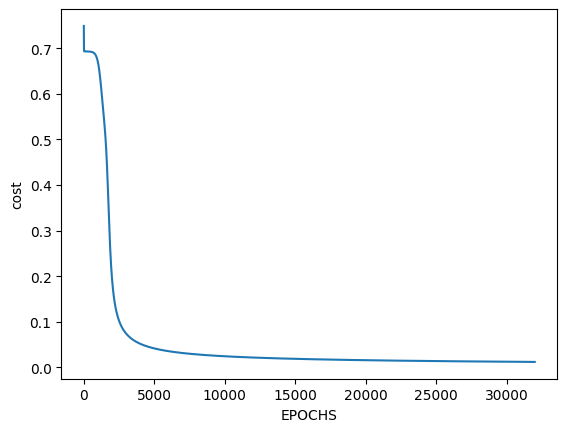

In [10]:
# We plot losses to see how our network is doing
plt.plot(cost1)
plt.xlabel("EPOCHS")
plt.ylabel("cost")

Using Learning Rate

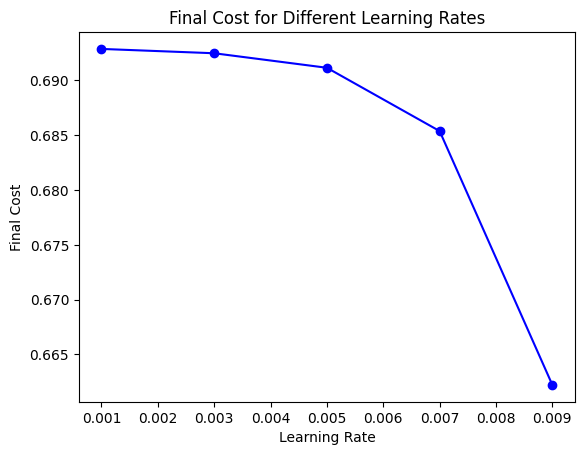

Best learning rate: 0.009


In [11]:
iterations = 32000

learning_rates = [0.001,0.003,0.005,0.007,0.009]
costs = []
best_cost = np.inf
best_lr = None

for lr in learning_rates:
    # Reset weights and biases
    np.random.seed(2)
    w1 = np.random.rand(n_h,n_x)
    b1 = np.zeros((n_h, 1))
    w2 = np.random.rand(n_y,n_h)
    b2 = np.zeros((n_y, 1))
    
    cost1 = []
    for i in range(iterations):
        z1,a1,z2,a2 = forward_prop(w1, b1, w2, b2, x)
        cost= -(1/m)*np.sum(y*np.log(a2)+(1-y)*np.log(1-a2))
        cost1.append(cost)
        da2,dw2,db2,dz1,dw1,db1 = back_prop(m, w1, b1, w2, b2, z1, a1, z2, a2, y)
        w2 = w2-lr*dw2
        b2 = b2-lr*db2
        w1 = w1-lr*dw1
        b1 = b1-lr*db1
    
    # Save the final cost and check if it's the best so far
    final_cost = cost1[-1]
    costs.append(final_cost)
    if final_cost < best_cost:
        best_cost = final_cost
        best_lr = lr

# Plot the costs for each learning rate
plt.plot(learning_rates, costs, 'bo-')
plt.xlabel("Learning Rate")
plt.ylabel("Final Cost")
plt.title("Final Cost for Different Learning Rates")
plt.show()

print("Best learning rate:", best_lr)

Back-Propagation


In [12]:

from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
X, y = make_classification(n_samples=100, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,random_state=1)
clf = MLPClassifier(random_state=1, max_iter=300)
clf.fit(X_train, y_train)


MLPClassifier(max_iter=300, random_state=1)

In [13]:
clf.predict_proba(X_test[:1])

array([[0.03838405, 0.96161595]])

In [14]:
clf.predict(X_test[:5, :])


array([1, 0, 1, 0, 1])

In [15]:

clf.score(X_test, y_test)


0.88

In [16]:
X = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([0, 1, 1, 0])


In [17]:
print(X)
print(y)

[[0 0]
 [0 1]
 [1 0]
 [1 1]]
[0 1 1 0]


In [18]:

clf = MLPClassifier(random_state=1, max_iter=100)



In [19]:

clf.fit(X, y)


/Users/arhamjain/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=100, random_state=1)

In [20]:

print("OUTPUTS:",clf.predict(X))
print("Accuracy",clf.score(X, y))

OUTPUTS: [0 1 1 0]
Accuracy 1.0
